In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

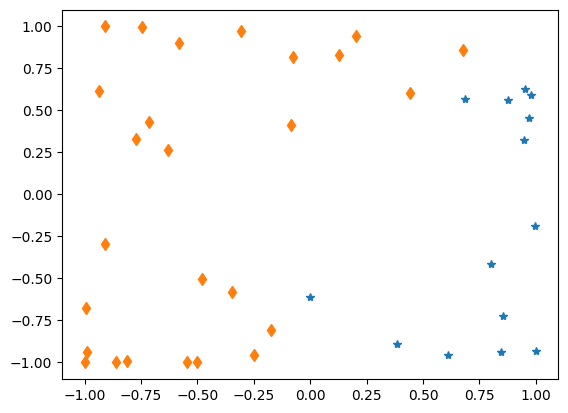

In [ ]:
x = np.sin(10 * np.arange(1, 41)**3)
y = np.sin(124 * np.arange(1, 41)**3)
cl = (2 * x < y + 0.5) + 1;
I1 = cl==1
I2 = cl==2
x1 = x[I1] # x-components of class 1 points
y1 = y[I1] # y-components of class 1 points
x2 = x[I2] # x-components of class 2 points
y2 = y[I2] # y-components of class 2 points
plt.plot(x1,y1,'*')
plt.plot(x2,y2,'d')
plt.show()

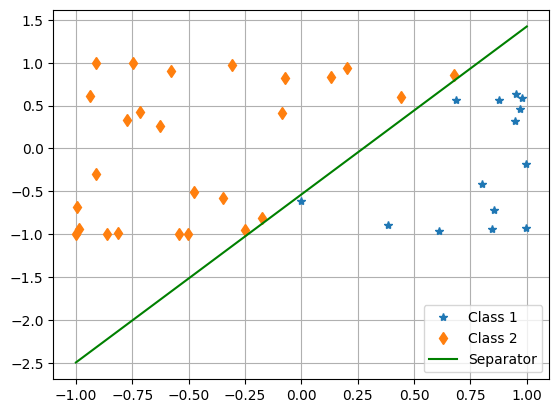

Separator: y = 1.96x + -0.54


In [ ]:
w = cp.Variable(2)
b = cp.Variable()

constraints = [
    x1 * w[0] + y1 * w[1] + b >= 1,
    x2 * w[0] + y2 * w[1] + b <= -1
]

objective = cp.Minimize(cp.norm(w))

prob = cp.Problem(objective, constraints)
prob.solve()

w_opt = w.value
b_opt = b.value

plt.plot(x1, y1, '*', label='Class 1')
plt.plot(x2, y2, 'd', label='Class 2')
x_line = np.linspace(-1, 1, 100)
y_line = (-w_opt[0] / w_opt[1]) * x_line - b_opt / w_opt[1]
plt.plot(x_line, y_line, 'g', label='Separator')
plt.legend()
plt.grid(True)
plt.show()

print(f'Separator: y = {(-w_opt[0] / w_opt[1]):.2f}x + {(-b_opt / w_opt[1]):.2f}')
